# Deriving a Chebyshev lowpass filter from a transfer function
May Last update: 1 Feb 2026  

This notebook attempts to answer a question posted on electronics stackexchange and linked here: [Deriving a Chebyshev lowpass filter from a transfer function](https://electronics.stackexchange.com/questions/735126/deriving-a-chebyshev-lowpass-filter-from-a-transfer-function). The orginal question, comments and answers are copied below.

---

## Question

I want to determine the values of the Chebyshev filter having the following transfer function.  
$H(s)=\dfrac{0.0626}{(s^2+0.1098s+0.936)(s^2+0.2873s+0.377)(s+0.1775)}$

My initial road map on this problem was finding reflection coeff. of the filter by performing the following equation.  
$|\rho(s)|^2=1-|H(s)|^2$

Then, determining Z11 of the filter by calculating it from the following equation.  

$Z_{11}=\dfrac{1-\rho(s)}{1+\rho(s)}$

Hence, I could find the poles and zeros of the function and related ripple value according to values. But the expression becomes too complex to handle. Clearly, my roadmap for solving the problem is wrong. 

**How can I obtain values of the components of the low-pass Chebyshev filter from a given transfer function?** 

asked Jan 5, 2025 at 20:35  
Aldrich Taylor  

---

The following are comments and answers.

## Comments

>Well, you can find the poles easily enough directly from H(s); one is when s = -0.1775 and the others are fairly easy to uncover. –   
>Andy aka  
>Commented Jan 5, 2025 at 20:43  

>Are you trying to build an LC ladder filter? I think your reflection coefficient equation is only valid for jω and not s. –   
Ste Kulov  
Commented Jan 5, 2025 at 23:05  

>1  
The parts values depend, of course, on the selected topology of the 5th-order filter. For an active realization it is relatively easy to find the values for the three stages in series. –   
LvW  
Commented Jan 6, 2025 at 7:52  

> what should I do after finding the poles? @Andyaka –   
Aldrich Taylor  
Commented Jan 6, 2025 at 10:01  

> @AldrichTaylor I quote you here: I could find the poles and zeros of the function and related ripple value according to values. <-- so what else do you need to do other than make the schematic of this unity gain 5th order low-pass filter? –   
Andy aka  
Commented Jan 6, 2025 at 10:02  

> that is a misunderstanding. What I wanted to mean was if I could find the Z11, I would find the poles and zeros of the function and related ripple value according to values. @Andyaka –   
Aldrich Taylor  
Commented Jan 6, 2025 at 10:24  

> Maybe you missed my previous comment. I asked if you’re trying to build an LC ladder filter because Z11 only applies for that type of structure. You should clarify this because most of the answers you are getting are for different topologies. –   
Ste Kulov  
Commented Jan 6, 2025 at 21:11  

> yes in fact I want to design an Lc ladder filter by using chebyshev polynomials @SteKulov –   
Aldrich Taylor  
Commented Jan 7, 2025 at 10:53  

> @AldrichTaylor Deriving the ladder coefficients yourself is quite complicated. What's more commonly done is you use the pre-calculated tables found in textbooks such as Williams or Zverev. Or use the web app that Verbal Kint linked. –   
Ste Kulov  
Commented Jan 14, 2025 at 4:05  


## 3 Answers 

I like reformatting expressions to have them fit a low-entropy shape in which poles, zeroes and gain are explicit. Then, you will see that you have a first-order low-pass filter cascaded with two second-order polynomials, each affected by a resonant frequency and a quality factor as underlined by Andy aka in his answer.

This is what you see below where I have plotted your transfer function versus its factored form. Please note the unit of time in seconds [s] and squared seconds [s²] for the b coefficients as Mathcad checks the expressions for homogeneity.


From this expression, you can now build a simple passive filter made of cascaded networks, provided they do not load each other. You can then separately determine the RLC components values knowing the resonant frequency and the Q of these networks:

![](zOc319C5.png)

From this expression, you can now build a simple passive filter made of cascaded networks, provided they do not load each other. You can then separately determine the RLC components values knowing the resonant frequency and the Q of these networks:

![](Q1MrX6nZ.png)

Years ago, I remember filter master from Intusoft which let you determine values for passive filters but it's now gone with the wind. I have found this site which computes different types of filters structures and cascades networks without intermediate buffers - 5th-order TF to be determined and properly factored:


![](TV8OPdJj.png)

There is a 6-dB attenuation due to the 50-Ohm resistances and the capacitance/inductance values are unrealistic of course, but I thought it was good for the example.

edited Jan 6, 2025 at 13:54  
answered Jan 6, 2025 at 13:37  
Verbal Kint  

---

> *How can I obtain values of the components of the low-pass Chebyshev
> filter from a given transfer function?*

This is your transfer function: -

$$H(s)=\dfrac{0.0626}{(s^2+0.1098s+0.936)(s^2+0.2873s+0.377)(s+0.1775)}$$

So break it down to three cascaded TF's like this: -

$$H(s)=\dfrac{0.936}{(s^2+0.1098s+0.936)}\times \dfrac{0.377}{(s^2+0.2873s+0.377)}\times \dfrac{0.1775}{s+0.1775}$$

These are now in standard format for solving i.e. for the 1st section:

 - \$\omega_n^2 = 0.936\$
 - \$2\zeta\omega_n = 0.1098\$

Then, solve each one individually and, for each of the 1st two sections, use a Sallen-Key op-amp circuit then, use a single order low-pass filter for the final part. Cascade them together and that will work. You can even check your implementation in something like micro-cap (a free circuit simulator).


edited Jan 6, 2025 at 10:50  
answered Jan 6, 2025 at 10:33  
Andy aka  

## Comments

The relation between the above mentioned numbers (pole frequency and damping) depends on the selected filter topology and can be found in suitable publications. –   
LvW  
Commented Jan 6, 2025 at 11:33  

but I want to design a passive LPF in Chebyshev topology. I could be able to realize the circuit without using op-amp. @Andyaka –   
Aldrich Taylor  
Commented Jan 6, 2025 at 13:02  

@AldrichTaylor it is the pole position that defines whether it's a Chebyshev so, when you say but I want to design a passive LPF in Chebyshev topology <-- that does not make sense because Chebyshev isn't a topology. Given how low the frequencies are your inductors would be massive (like house bricks) so, forget that idea completely. –   
Andy aka  
Commented Jan 6, 2025 at 13:41  

---

Study the solution for LC filters or Active filters using fo dB ripple and order.  See the two 2nd order (in denominator)and one 1st order.

after page 38  https://ieee.li/pdf/introduction_to_power_electronics/chapter_08.pdf

![](pBneLwKf.png)

\$H(s)=\dfrac{0.0626}{(s^2+0.1098s+0.936)(s^2+0.2873s+0.377)(s+0.1775)}\$

Solve quadratic roots using binomials;
\$s=\dfrac{{−b±\sqrt{b^2−4ac}}}{2a}\$  for \$as^2+bs+c=0\$ then tell me what U get.

---

From my handbook of filter synthesis by Anatol I. Zverev or any similar webpage Rd​(dB)=10 log10​(1+ε^2) with ε for ripple factor in dB –   
Tony Stewart EE since 1975  
Commented Jan 5, 2025 at 21:26  

---

## My Solution
I'm answering this question more than a year after it was initially asked. Three other answers have been provided, however, my answer is the only answer that provides an LC ladder network as requested. Synthesizing a network from the transfer function such that the result is a ladder type topology is known as [Cauer](https://en.wikipedia.org/wiki/Wilhelm_Cauer) network systhesis. My proposed solution was developed using Python in a JupyterLab notebook which is available on GitHub here](). What you see below are parts of the notebook pasted into the answer dialog box.    

Solution steps:

- Enter the polynomials for numerator and denominator of $H(s)$ as a SymPy expression
- From $H(s)$ develop $Z_{11}(s)$
- Find the continued fraction expansion of $Z_{11}(s)$
- Examine the terms and recognize what circuit component each term represents
- Draw the schematic of the circuit
- Verify the solution
  - generate the netlist
  - Use MNA to generate the circuit equations
  - Solve for the unknown voltages and currents
  - Find $\frac {v_2(s)}{v_1(s)}$
  - Check that the polynominals match
- Plot the pole and zero locations on the complex frequency plane, do the poles lie on an ellipse?
- Plot the magnitude and phase of the transfer function.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()
from scipy.optimize import fsolve

The `continued_fraction_expansion` function was generated by Google Gemini from a prompt. Gemini is Google’s artificial intelligence tool.

In [2]:
def continued_fraction_expansion(P, var):
    """
    Performs continued fraction expansion (Cauer form) of a rational function.
    Returns a list of the coefficients/terms.
    """
    terms = []
    num, den = fraction(P)
    
    while den != 0:
        # Perform polynomial division: num / den
        # q is the quotient (the series term), r is the remainder
        q, r = div(num, den, var)
        
        terms.append(q)
        
        # Prepare for the next step: 1 / (r / den) -> den / r
        num = den
        den = r
        
        # Stop if the remainder is a simple constant or 0
        if den == 0:
            break
            
    return terms

The `get_even_odd_parts` function was generated by Google Gemini from a prompt.

In [3]:
def get_even_odd_parts(poly_expr, s):
    """
    Extracts the even and odd parts of a polynomial expression.
    """
    # Define P(-s)
    poly_neg = poly_expr.subs(s, -s)
    
    # Apply the arithmetic definitions
    even_part = simplify((poly_expr + poly_neg) / 2)
    odd_part = simplify((poly_expr - poly_neg) / 2)
    
    return even_part, odd_part

Declare a SymPy variable $s$ as the Laplace operator. 

In [4]:
s = symbols('s')

By using some concepts taken from modern network synthesis theory, an expression for $Z_{11}(s)$ can be obtained from the characteristic polynominal, which is the denominator of $H(s)$. 

Enter the numerator and denominator polynominals for the transfer function that was provided in the original question. 

In [5]:
H_num = 0.0626
H_den = (s**2+0.1098*s+0.936)*(s**2+0.2873*s+0.377)*(s+0.1775)

The transfer function has no zeros and there are five poles. The denominator polynominal is the one we want to use.

In [6]:
Markdown('denominator: ${:s}$'.format(latex(H_den)))

denominator: $\left(s + 0.1775\right) \left(s^{2} + 0.1098 s + 0.936\right) \left(s^{2} + 0.2873 s + 0.377\right)$

Expanding the expression we get:

In [7]:
Markdown('denominator: ${:s}$'.format(latex(H_den.expand())))

denominator: $s^{5} + 0.5746 s^{4} + 1.41503079 s^{3} + 0.54896423335 s^{2} + 0.4079515635 s + 0.06263478$

$Z_{11}(s)$ can sometimes be the ratio of the even part of the denominator to the odd part. Let's assume that it is, and just proceed with a Cauer LC ladder synthesis. If it's not the case, we will get negative numbers when doing the continued fraction expansion. This procedure is described in most _Network Synthesis_ text books. @AldrichTaylor asked for a LC ladder realization of the transfer function and that he wanted a derivation using a chebyshev polynomial. As @Andyaka stated in his comment, Chebyshev is not a topology, but rather a description of the pole locations. Later, the pole and zeros of $H(s)$ will be plotted on the complex plane to classify the type of polynominal $H(s)$ might be. 

Using the function `get_even_odd_parts`, we can formulate $Z_{11}$ as shown below.

In [8]:
H_den_even, H_den_odd = get_even_odd_parts(H_den, s)

print(f"Even Part: {H_den_even}")
print(f"Odd Part:  {H_den_odd}")

Even Part: 0.5746*s**4 + 0.54896423335*s**2 + 0.06263478
Odd Part:  s*(1.0*s**4 + 1.41503079*s**2 + 0.4079515635)


In [9]:
Z11 = H_den_even.expand()/H_den_odd.expand()
Markdown('$Z11(s)={:s}$'.format(latex(Z11)))

$Z11(s)=\frac{0.5746 s^{4} + 0.54896423335 s^{2} + 0.06263478}{1.0 s^{5} + 1.41503079 s^{3} + 0.4079515635 s}$

A continued fraction expansion of $Z_{11}$ using the Python function produced a zero for the first term. So this is remedied by expanding $\frac{1}{Z_{11}}$ and the first element of the filter will be a shunt capacitor. Below the function `continued_fraction_expansion` is called to perform a continued fraction expansion on $\frac{1}{Z_{11}}$.

In [10]:
expansion_terms = continued_fraction_expansion(1/Z11, s)

Display the results:

In [11]:
print("Continued Fraction Terms:")
for i, term in enumerate(expansion_terms):
    print(f'Term {i+1}: {term}')

Continued Fraction Terms:
Term 1: 1.74034110685694*s
Term 2: 1.25009309204924*s
Term 3: 2.62273600180312*s
Term 4: 1.30134963664493*s
Term 5: 2.15010236606628*s


The function `continued_fraction_expansion` generates terms that can be recognized as the components of a ladder network. Term 1 is $1.74s$ which can be expressed as a 1.74 farad shunt capacitor. The capacitor is shown in the schematic below as $C_1$. Term 2 is a series 1.25 henry inductor, $L_1$. Terms 3, 4 and 5 are developed into $C_2$, $L_2$ and $C_3$ in the schematic below. In the schematic, all the digits are used in the element values so that the full resolution is maintained and we will be able to compare results. 

![](Deriving_a_Chebyshev_lowpass_filter_from_a_transfer_function.png)

## Checking the Results
The proposed circuit was drawn in LTSpice and the netlist was copied into the cell below. The component values out to 14 decimal places are being used to get a higher resolution solution.

In [12]:
net_list = '''
V1 1 0 1
L1 3 4 1.25009309204924
L2 4 2 1.30134963664493
C1 3 0 1.74034110685694
C2 4 0 2.62273600180312
R1 3 1 1
C3 2 0 2.15010236606628
'''

The [Modified Nodal Analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis) (MNA) procedure was used to generate the network equations from the schematic's netlist. The procedure is implemented in Python, and the function `SymMNA.smna(net_list)` returns the network matrices along with a report and two Pandas data frames. The Python module available on GitHub at [SymMNA](https://github.com/Tiburonboy/SymMNA).

In [13]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [14]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# turn the free symbols into SymPy variables.
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

element_values = SymMNA.get_part_values(network_df)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}}$<br>$0 = C_{3} s v_{2} - I_{L2}$<br>$0 = I_{L1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$<br>$0 = C_{2} s v_{4} - I_{L1} + I_{L2}$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s + v_{3} - v_{4}$<br>$0 = - I_{L2} L_{2} s - v_{2} + v_{4}$<br>

The symbolic network equations can be solved using the SymPy `solve` function. First the element values are substituted into the equations.

In [15]:
NE = NE_sym.subs(element_values)

Display the network equations with numerical values.

In [16]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 1.0 v_{1} - 1.0 v_{3}$<br>$0 = - I_{L2} + 2.15010236606628 s v_{2}$<br>$0 = I_{L1} - 1.0 v_{1} + v_{3} \cdot \left(1.74034110685694 s + 1.0\right)$<br>$0 = - I_{L1} + I_{L2} + 2.62273600180312 s v_{4}$<br>$1.0 = v_{1}$<br>$0 = - 1.25009309204924 I_{L1} s + v_{3} - v_{4}$<br>$0 = - 1.30134963664493 I_{L2} s - v_{2} + v_{4}$<br>

Solving for the node voltages and unknown currents, then display the results.

In [17]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{3.90625 \cdot 10^{67}}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>$v_{3} = \frac{3.58352220603313 \cdot 10^{68} s^{4} + 3.42364343983237 \cdot 10^{68} s^{2} + 3.90625 \cdot 10^{67}}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>$v_{4} = \frac{1.09298239563662 \cdot 10^{68} s^{2} + 3.90625 \cdot 10^{67}}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>$I_{V1} = \frac{- 6.23655100249412 \cdot 10^{68} s^{5} - 8.82491169193456 \cdot 10^{68} s^{3} - 2.54421073231498 \cdot 10^{68} s}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>$I_{L1} = \frac{2.8666042783732 \cdot 10^{68} s^{3} + 1.86438998744898 \cdot 10^{68} s}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>$I_{L2} = \frac{8.39883736744641 \cdot 10^{67} s}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$<br>

The transfer function calculated from the circuit is shown below as $H1$.

In [18]:
H1 = U[v2]/U[v1]
Markdown('H1: ${:s}$'.format(latex(H1)))

H1: $\frac{3.90625 \cdot 10^{67}}{6.23655100249412 \cdot 10^{68} s^{5} + 3.58352220603313 \cdot 10^{68} s^{4} + 8.82491169193456 \cdot 10^{68} s^{3} + 3.42364343983237 \cdot 10^{68} s^{2} + 2.54421073231498 \cdot 10^{68} s + 3.90625 \cdot 10^{67}}$

The expression for $H1$ has some rather large exponents, so the following steps are taken to reduce the expression back to the original form.

Using `nsimplify()` and `cancel()` we get:

In [19]:
Markdown('${:s}$'.format(latex(H1.nsimplify().cancel())))

$\frac{39062500000000}{623655100249412 s^{5} + 358352220603313 s^{4} + 882491169193456 s^{3} + 342364343983237 s^{2} + 254421073231498 s + 39062500000000}$

Get the numerator and denominator of the expression so we can further simplify.

In [20]:
H1_num, H1_den = fraction(H1)

The denominator is:

In [21]:
Markdown('${:s}$'.format(latex(H1_den/H1_num)))

$15.9655705663849 s^{5} + 9.17381684744481 s^{4} + 22.5917739313525 s^{3} + 8.76452720597086 s^{2} + 6.51317947472634 s + 1.0$

Dividing through by the coefficient of $s^5$, we get:

In [22]:
# get coefficient of s^5
b5 = (H1_den/H1_num).coeff(s, 5)
Markdown('${:s}$'.format(latex(H1_den/H1_num/b5)))

$1.0 s^{5} + 0.574600000000001 s^{4} + 1.41503079 s^{3} + 0.548964233350002 s^{2} + 0.407951563500001 s + 0.0626347800000002$

The numerical coefficients in the expression above match those in the original transfer function, which is displayed below. This verifies the synthesis procedure.

In [23]:
Markdown('${:s}$'.format(latex(H_den.expand())))

$s^{5} + 0.5746 s^{4} + 1.41503079 s^{3} + 0.54896423335 s^{2} + 0.4079515635 s + 0.06263478$

## Poles and zeros of the transfer function
The poles and zeros of the original transfer function can be obtained with the following code:

In [24]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_den, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

After a few guesses and running the code below a few times, it looks like the ripple for this filter is 3 dB. We can plot the ellipse of the pole locations for a Chebyshev with $n=5$ with a pass band ripple of 3 dB. 

In [25]:
ripple_db = 3
n = 5

# calculate epsilon from ripple in dB
epsilon = np.sqrt(10**(ripple_db / 10) - 1)

# calculate beta parameter
beta = (1/n) * np.arcsinh(1/epsilon)

# calculate semi-axes
A = np.sinh(beta)  
B = np.cosh(beta)  

# generate ellipse points for plotting
t = np.linspace(0, 2 * np.pi, 500)
sigma_ellipse = A * np.cos(t)
omega_ellipse = B * np.sin(t)

In the plot below, the pole locations are marked with an "X" and the ellipse of where they should lie is shown as a blue dashed line.

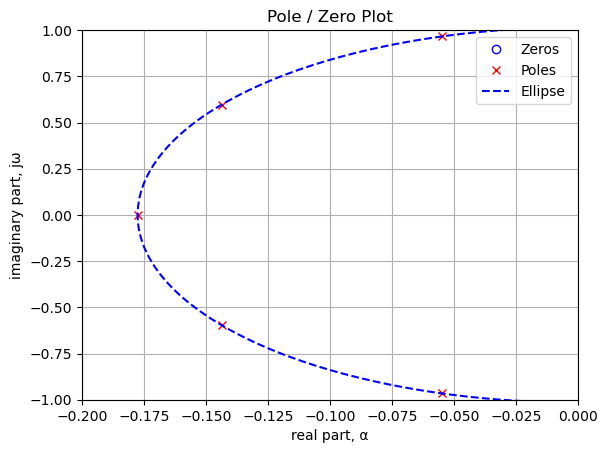

In [26]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')

plt.plot(sigma_ellipse, omega_ellipse, color='blue', linestyle='--')

plt.legend(['Zeros', 'Poles', 'Ellipse'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.xlim((-0.2,0))
plt.ylim((-1,1))
plt.grid()
plt.show()

As seen in the plot above, the poles of the transfer function are on the ellipse suggesting that the original transfer function is a Chebyshev polynomial.

Finally we can plot the magnitude and phase of the filter's transfer function.

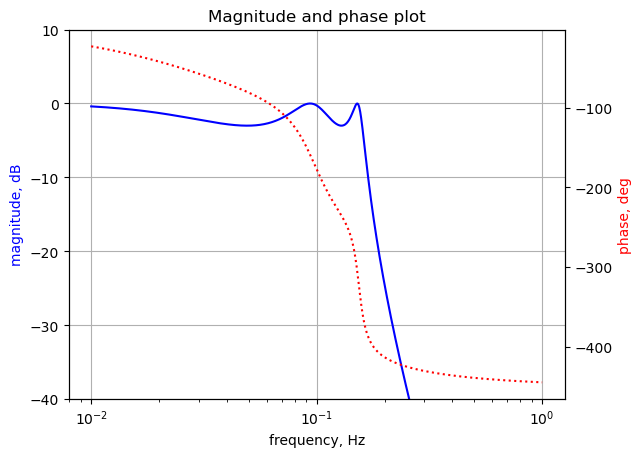

In [27]:
x = np.logspace(-2, 0, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode((a,b), w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB',color='b')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
plt.ylim((-40,10))

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'r'

plt.semilogx(w/(2*np.pi), phase,':',color=color)  # phase plot

ax2.set_ylabel('phase, deg',color=color)

plt.title('Magnitude and phase plot')
plt.show()

As shown above, with the help of some Python code, some transfer functions can easily be synthesized. 